In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df=pd.read_csv('winequality-red.csv')
df.shape

(1599, 12)

In [3]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(240)

In [8]:
df=df.drop_duplicates()

In [9]:
df.skew()

fixed acidity           0.941041
volatile acidity        0.729279
citric acid             0.312726
residual sugar          4.548153
chlorides               5.502487
free sulfur dioxide     1.226579
total sulfur dioxide    1.540368
density                 0.044778
pH                      0.232032
sulphates               2.406505
alcohol                 0.859841
quality                 0.192407
dtype: float64

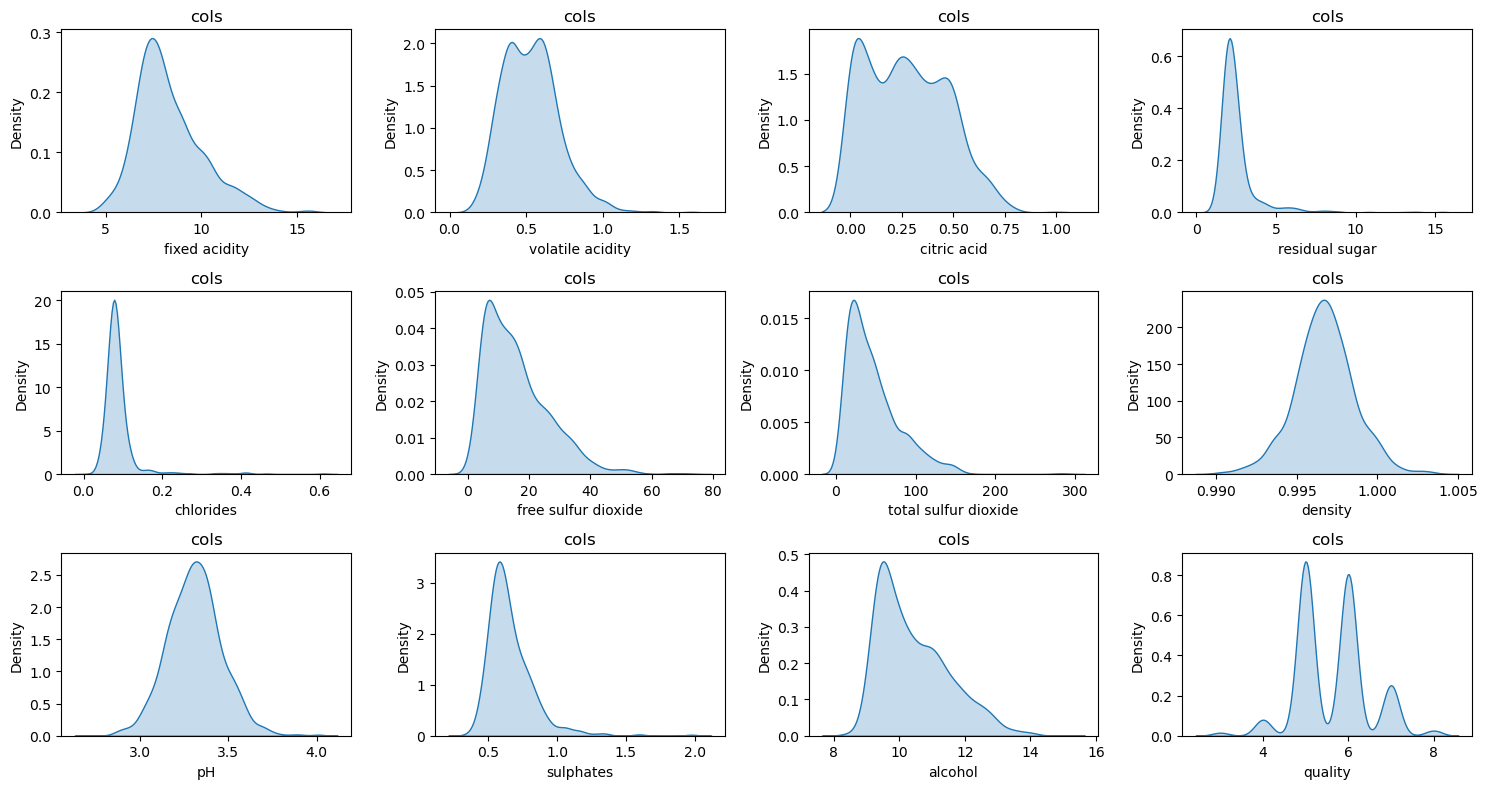

In [10]:
plt.figure(figsize=(15,8))
for i,cols in enumerate(df.columns,1):
    plt.subplot(3,4,i)
    sns.kdeplot(df[cols],fill=True)
    plt.title(f"cols")
plt.tight_layout()
plt.show()

In [11]:
df['residual sugar']=np.log1p(df['residual sugar'])
df['chlorides']=np.log1p(df['chlorides'])
df['free sulfur dioxide']=np.log1p(df['free sulfur dioxide'])
df['total sulfur dioxide']=np.log1p(df['total sulfur dioxide'])
df['sulphates']=np.log1p(df['sulphates'])
df['alcohol']=np.log1p(df['alcohol'])
df.skew()

fixed acidity           0.941041
volatile acidity        0.729279
citric acid             0.312726
residual sugar          2.217472
chlorides               4.927737
free sulfur dioxide    -0.090901
total sulfur dioxide   -0.035459
density                 0.044778
pH                      0.232032
sulphates               1.629700
alcohol                 0.679095
quality                 0.192407
dtype: float64

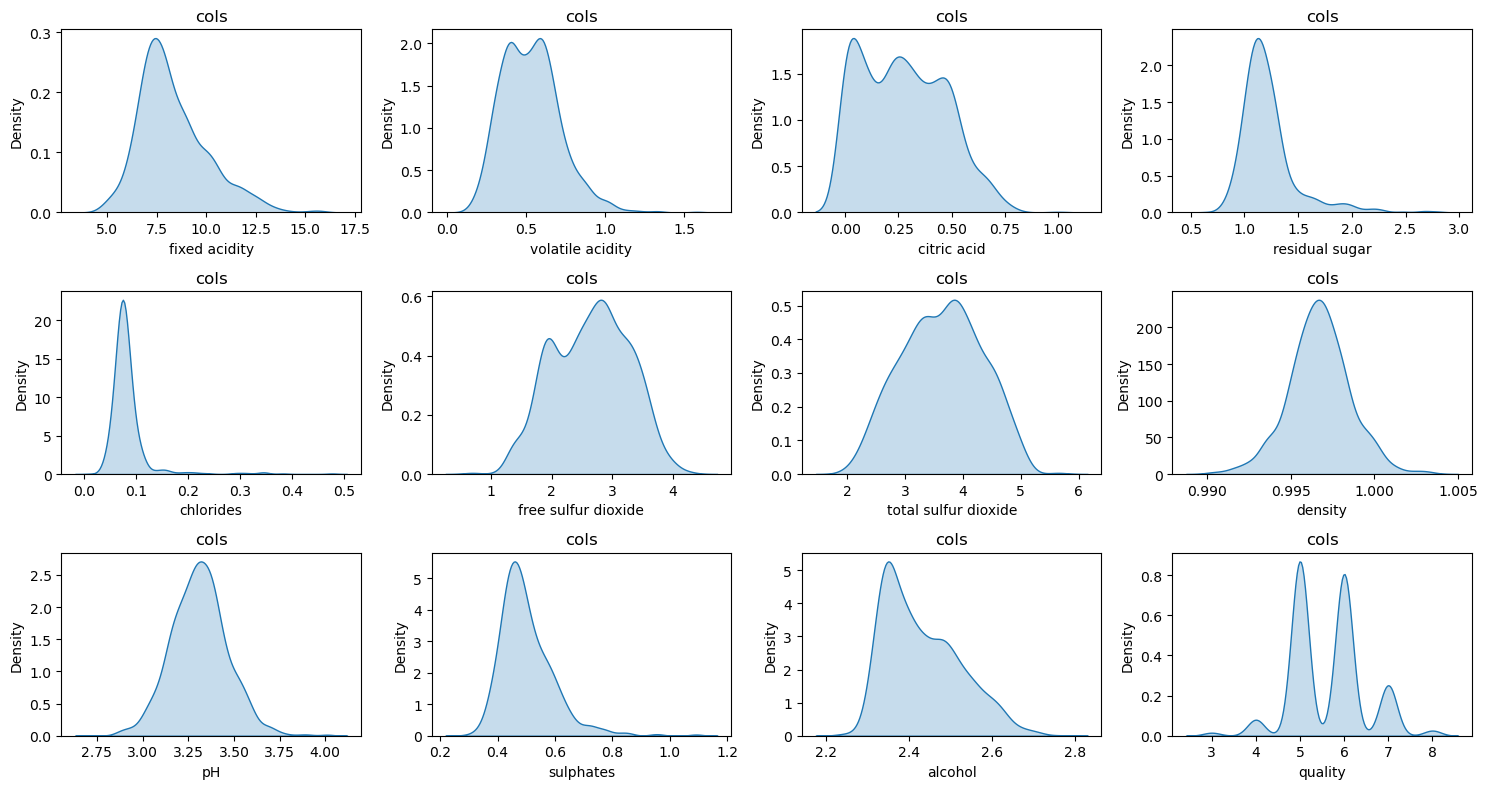

In [12]:
plt.figure(figsize=(15,8))
for i,cols in enumerate(df.columns,1):
    plt.subplot(3,4,i)
    sns.kdeplot(df[cols],fill=True)
    plt.title(f"cols")
plt.tight_layout()
plt.show()

In [13]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3])

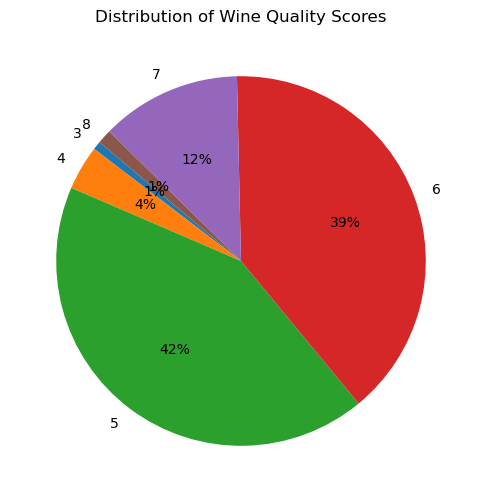

In [14]:
plt.figure(figsize=(6,6))
quality_counts = df['quality'].value_counts().sort_index()
plt.pie(quality_counts, labels=quality_counts.index, autopct='%0.0f%%', startangle=140)
plt.title("Distribution of Wine Quality Scores")
plt.show()

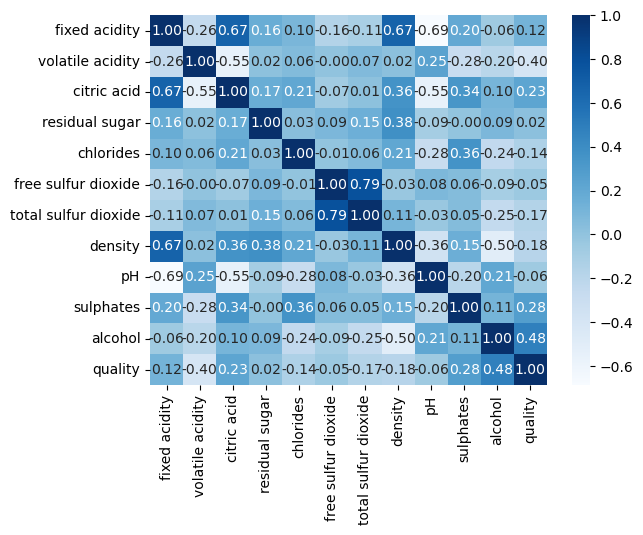

In [15]:
sns.heatmap(df.corr(),annot=True,fmt=".2f",cmap='Blues')
plt.show()

In [16]:
df.to_csv('cleaned_dataset.csv', index=False)